# Machine Learning Model On Black Friday Sales

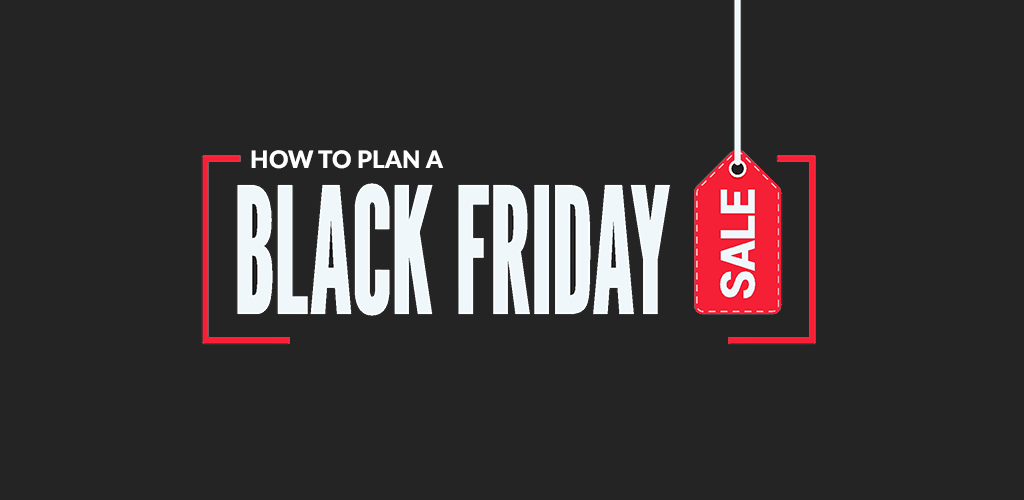

## Contents

* [Description](#Description:)<br>
* [Problem Statement](#Problem-Statement.)<br>
* [Import Libraries And Data](#Import-Libraries-And-Data)
* [Data Loading and Description](#Data-Loading-and-Description)
* [Basic Data Exploration](#Basic-Data-Exploration)
* [Data Profiling](#Profiling-Report)
* [Checking for missing values](#Checking-for-missing-values)
    - * [Checking Null Values](#Checking-Null-Values)<br/>
    - * [Null Value in percentage](#Null-Value-in-percentage)<br/>
    - * [Analysing And Handling Null Values](#Analysing-And-Handling-Null-Values)<br/>
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br/>
    - * [1. A Pie Chart Representing The Gender Gap](#1.-A-Pie-Chart-Representing-The-Gender-Gap)<br/>
    - * [2. Number of Purchases by Gender](#2.-Number-of-Purchases-by-Gender)<br/>
    - * [3. Distribution of Purchase Amounts](#3.-Distribution-of-Purchase-Amounts)<br/>
    - * [4. Number of Products Sold by Age Group](#4.-Number-of-Products-Sold-by-Age-Group)<br/>
    - * [5. Purchase Amount by City Category](#5.-Purchase-Amount-by-City-Category)<br/>
    - * [6. Number of Purchases by Occupation](#6.-Number-of-Purchases-by-Occupation)<br/>
    - * [7. Purchase Amount by Age](#7.-Purchase-Amount-by-Age)<br/>
    - * [8. Bar chart showing the total purchase amount by product category](#8.-Bar-chart-showing-the-total-purchase-amount-by-product-category)<br/>
    - * [9. Stacked bar chart showing the distribution of customers by gender and age group](#9.-Stacked-bar-chart-showing-the-distribution-of-customers-by-gender-and-age-group)<br/>
    - * [10. Box plot showing the distribution of purchase amounts by product category](#10.-Box-plot-showing-the-distribution-of-purchase-amounts-by-product-category)<br/>
    - * [11. Distribution of Customers by Gender and Marital Status](#11.-Distribution-of-Customers-by-Gender-and-Marital-Status)<br/>
    - * [12. Distribution of Purchase Amounts by Gender and City Category](#12.-Distribution-of-Purchase-Amounts-by-Gender-and-City-Category)<br/>
* [Feature Engineering for Model building](#Feature-Engineering-for-Model-building)<br/>
    - * [Drop unwanted columns](#Drop-unwanted-columns)<br/>
    - * [Correlation Between Numerical Features Using Heatmap](#Correlation-Between-Numerical-Features-Using-Heatmap)<br/>
    - * [Convert Categorical variable into Numerical](#Convert-Categorical-variable-into-Numerical)<br/>
    - * [Scaling And Transformation](#Scaling-And-Transformation)<br/>
    - * [Splitting Data Into Independent And Dependent Variables](#Splitting-Data-Into-Independent-And-Dependent-Variables)<br/>
* [Model Selection/Predictions](#Model-Selection/Predictions)<br/>
    - * [1. Linear Regression](#1.-Linear-Regression)<br/>
    - * [2. Decision Tree Regressor](#2.-Decision-Tree-Regressor)<br/>
    - * [3. Random Forest Regressor](#3.-Random-Forest-Regressor)<br/>
    - * [Actual Vs Predicted sample.](#Actual-Vs-Predicted-sample.)<br/>
* [Conclusions](#Conclusions)<br/>  

# Description:

In this project, we will first explore the dataset using NumPy and Pandas to perform data cleaning and preprocessing tasks. We will then use Seaborn and Matplotlib to create visualizations that help us gain insights into customer behavior and preferences. The visualizations will include histograms, bar charts, and heatmaps, among others.

After exploring the data, we will use Scikit-Learn to develop a machine learning model that predicts the purchase amount based on customer demographics. We will split the dataset into training and testing sets and evaluate the performance of different algorithms, such as linear regression, decision trees, and random forests. We will then select the best algorithm and use it to make predictions on the test dataset.

Finally, we will summarize our findings and provide recommendations for retailers based on our analysis. This project will help us develop skills in data analysis using NumPy, Pandas, Seaborn, and Matplotlib, as well as machine learning using Scikit-Learn.

# Problem Statement.

The Black Friday Sale dataset contains information about customer demographics, purchase behavior, and product categories. The goal of this project is to analyze the dataset to gain insights into customer behavior and preferences. This analysis will help retailers better understand their customers and improve their marketing strategies. In addition, a machine learning model will be developed to predict the purchase amount based on customer demographics.

# Import Libraries And Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
%matplotlib inline

plt.style.use('bmh')

# Data Loading and Description

In [2]:
data = pd.read_csv('Black Friday Sales.csv')

In [3]:
data.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
516279,1001505,P00272542,M,51-55,11,C,3,1,8,NaN,NaN,5944
328357,1002581,P00313642,M,26-35,11,A,1,0,6,10.0,NaN,20004
123914,1001146,P00324442,F,18-25,16,B,2,1,11,13.0,16.0,4690


The Black Friday Sales dataset is a dataset containing the transactions occurring in a retail store during Black Friday. The dataset contains the following columns:

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘User_ID’</td><td>A unique identifier for each user</td></tr>
<tr><td>‘Product_ID’</td><td>A unique identifier for each product</tr>
<tr><td>‘Gender’</td><td>Gender of the user (Male or Female)</td></tr>
<tr><td>‘Age’</td><td>Age of the user</td></tr>
<tr><td>‘Occupation’</td><td>Occupation of the user</td></tr>
<tr><td>‘City_Category’</td><td>Category of the city where the user lives (A, B or C)</td></tr>
<tr><td>‘Stay_In_Current_City_Years’</td><td>Number of years the user has lived in the current city</td></tr>
<tr><td>‘Marital_Status’</td><td>Marital status of the user</td></tr>
<tr><td>‘Product_Category_1’</td><td>Category of the product</td></tr>
<tr><td>‘Product_Category_2’</td><td>Category of the product</td></tr>
<tr><td>‘Product_Category_3’</td><td>Category of the product</td></tr>
<tr><td>‘Purchase’</td><td>Purchase amount in dollars</td></tr>
</table>

The dataset includes various features such as age, gender, marital status, product categories, and purchase amount. The dataset can be used for various machine learning tasks, including regression, clustering, and association rule mining. This dataset can be used to predict the purchase amount or product categories based on customer demographics or to perform customer segmentation analysis.

# Basic Data Exploration

In [4]:
data.shape

(550068, 12)

In [5]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Profiling Report

In [10]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, explorative = True, dark_mode = True)
profile.to_file(output_file="Black_Friday_Sale_Data_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-- You can find the report in the repository as "Black_Friday_Sale_Data_Report.html"

# Checking for missing values

### Checking Null Values

In [11]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Null Value in percentage

In [12]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

### Analysing And Handling Null Values 

In [13]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(0)

In [14]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(0)

# Exploratory Data Analysis

### 1. A Pie Chart Representing The Gender Gap

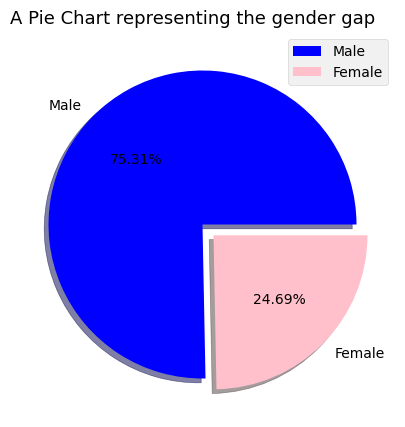

In [15]:
plt.figure(figsize = (8, 5))
plt.pie(data['Gender'].value_counts(), 
        colors = ['blue', 'pink'], 
        labels = ['Male', 'Female'], 
        shadow = True, 
        explode = [0, 0.1], 
        autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 13, loc = 'left')
plt.legend()
plt.show()

### 2. Number of Purchases by Gender

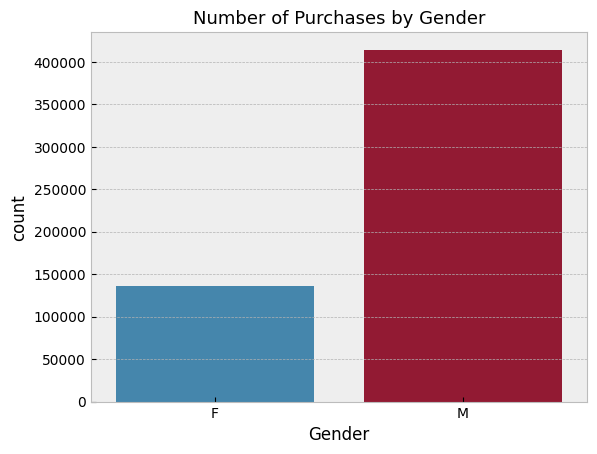

In [16]:
sns.countplot(x='Gender', data=data)
plt.title('Number of Purchases by Gender', fontsize = 13)
plt.show()

### 3. Distribution of Purchase Amounts

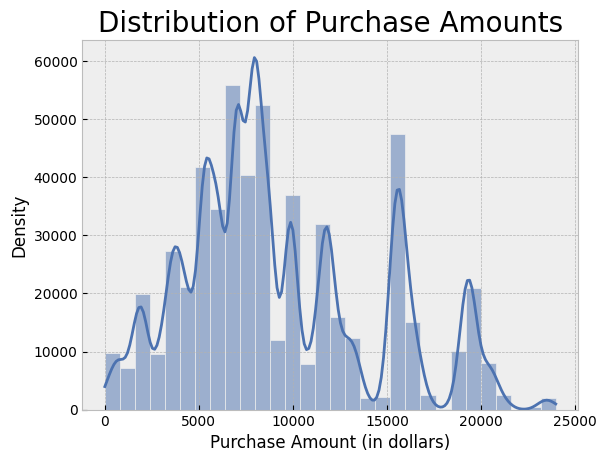

In [17]:
sns.histplot(data['Purchase'], kde=True, bins=30, color='#4C72B0')
plt.title('Distribution of Purchase Amounts', fontsize = 20)
plt.xlabel('Purchase Amount (in dollars)')
plt.ylabel('Density')
plt.show()

### 4. Number of Products Sold by Age Group

In [18]:
DF1 = pd.DataFrame(data.groupby('Age')['Purchase'].sum())
DF1.reset_index(inplace = True)
DF1

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


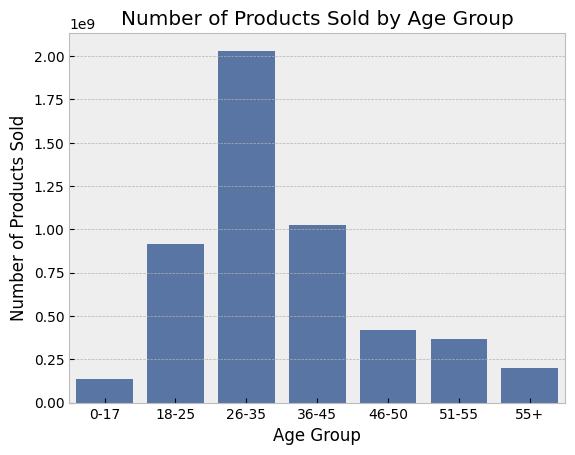

In [19]:
sns.barplot(data = DF1, x='Age', y='Purchase', color='#4C72B0')
plt.title('Number of Products Sold by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Products Sold')
plt.show()

### 5. Purchase Amount by City Category

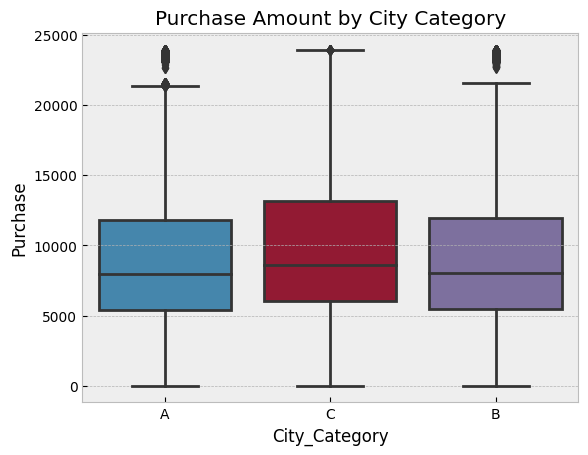

In [20]:
sns.boxplot(x='City_Category', y='Purchase', data=data)
plt.title('Purchase Amount by City Category')
plt.show()

### 6. Number of Purchases by Occupation

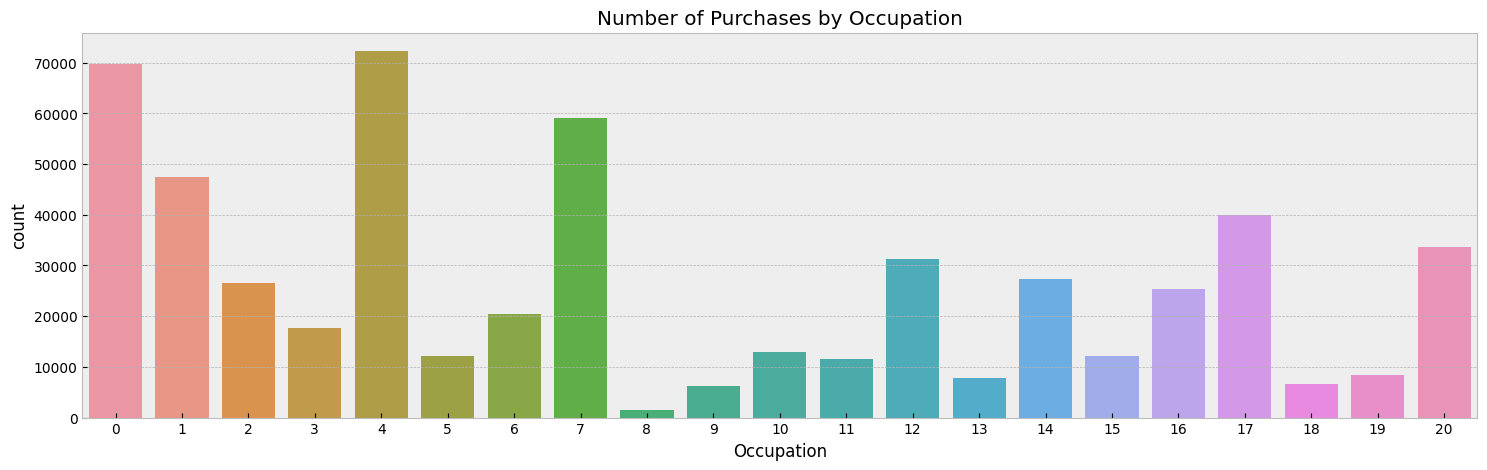

In [21]:
plt.figure(figsize=(18,5))
sns.countplot(x='Occupation', data=data)
plt.title('Number of Purchases by Occupation')
plt.show()

### 7. Purchase Amount by Age

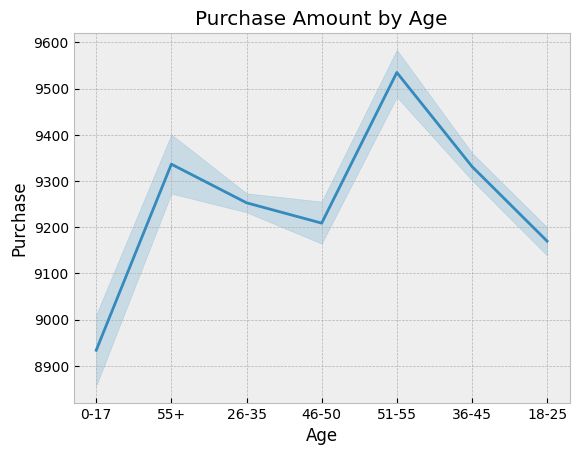

In [22]:
sns.lineplot(x='Age', y='Purchase', data=data)
plt.title('Purchase Amount by Age')
plt.show()

### 8. Bar chart showing the total purchase amount by product category

In [23]:
purchase_by_category = data.groupby('Product_Category_1')['Purchase'].sum()

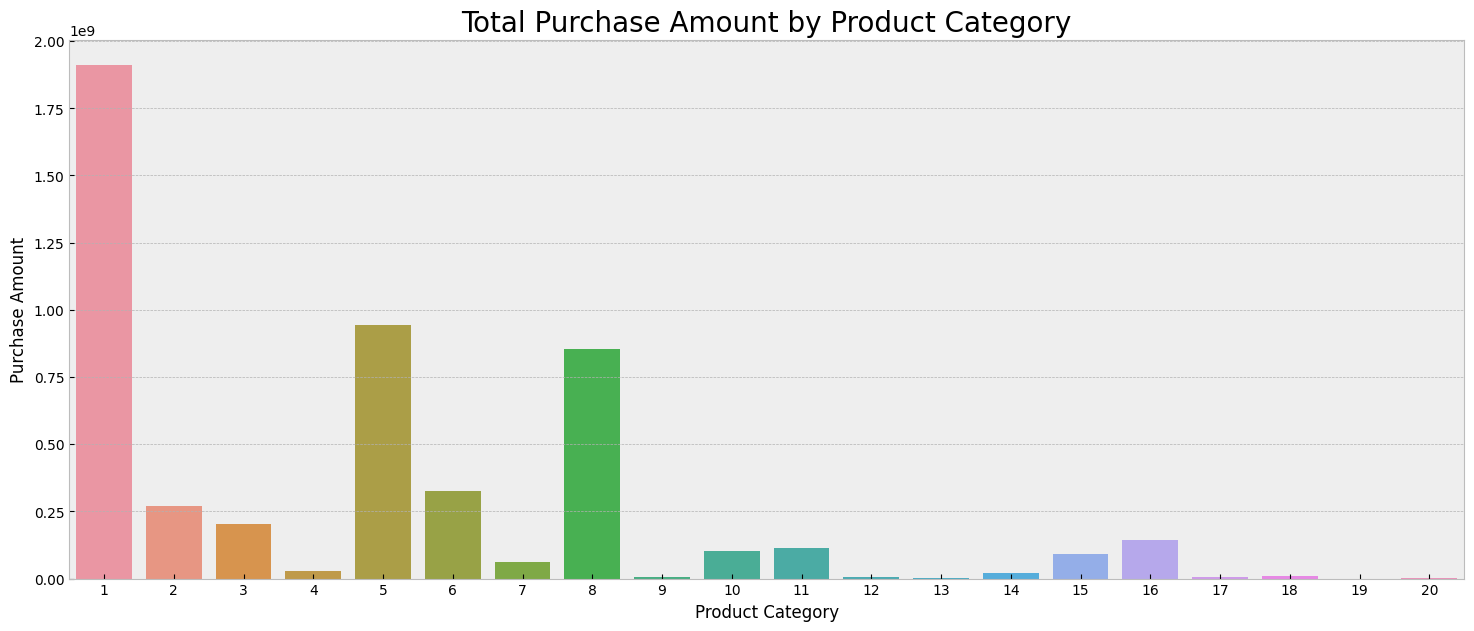

In [24]:
plt.figure(figsize=(18,7))
sns.barplot(data=data, x=purchase_by_category.index, y=purchase_by_category.values)
plt.title('Total Purchase Amount by Product Category', fontsize = 20)
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.show()

### 9. Stacked bar chart showing the distribution of customers by gender and age group

In [25]:
# Calculate the number of customers by gender and age group
customers_by_gender_age = data.groupby(['Gender', 'Age'])['User_ID'].nunique().unstack()

<Figure size 800x600 with 0 Axes>

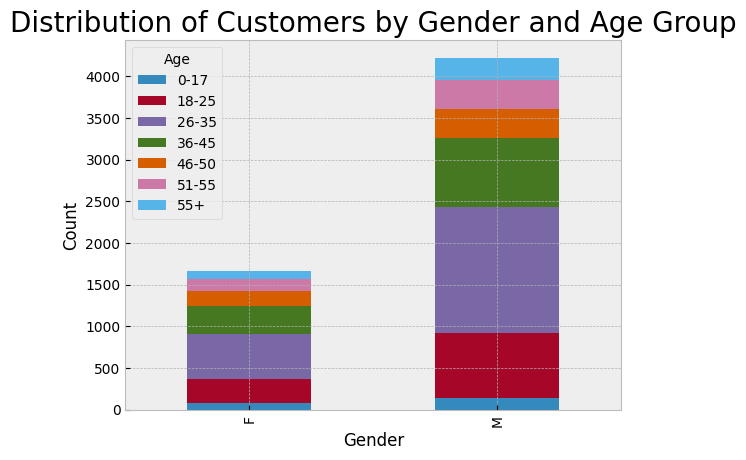

In [26]:
plt.figure(figsize=(8,6))
customers_by_gender_age.plot(kind='bar', stacked=True)
plt.title('Distribution of Customers by Gender and Age Group', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 10. Box plot showing the distribution of purchase amounts by product category

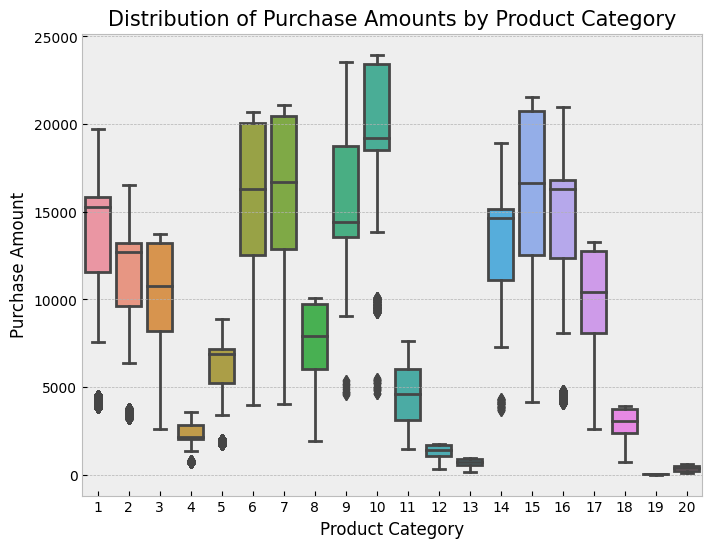

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Product_Category_1', y='Purchase')
plt.title('Distribution of Purchase Amounts by Product Category', fontsize = 15)
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.show()

### 11. Distribution of Customers by Gender and Marital Status

In [28]:
# Calculate the number of customers by gender and marital status
customers_by_gender_marital = data.groupby(['Gender', 'Marital_Status'])['User_ID'].nunique().unstack()

<Figure size 800x600 with 0 Axes>

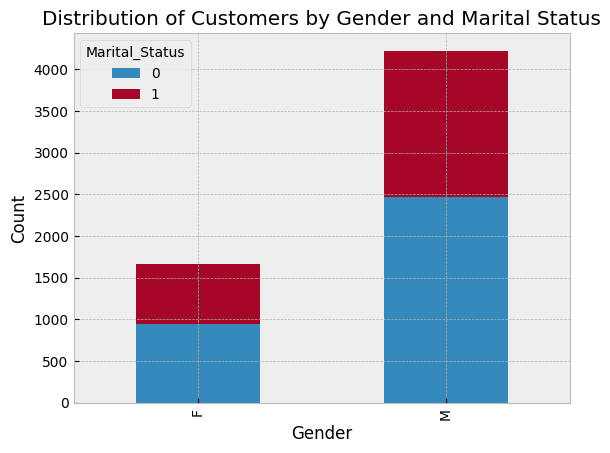

In [29]:
plt.figure(figsize=(8,6))
customers_by_gender_marital.plot(kind='bar', stacked=True)
plt.title('Distribution of Customers by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 12. Distribution of Purchase Amounts by Gender and City Category

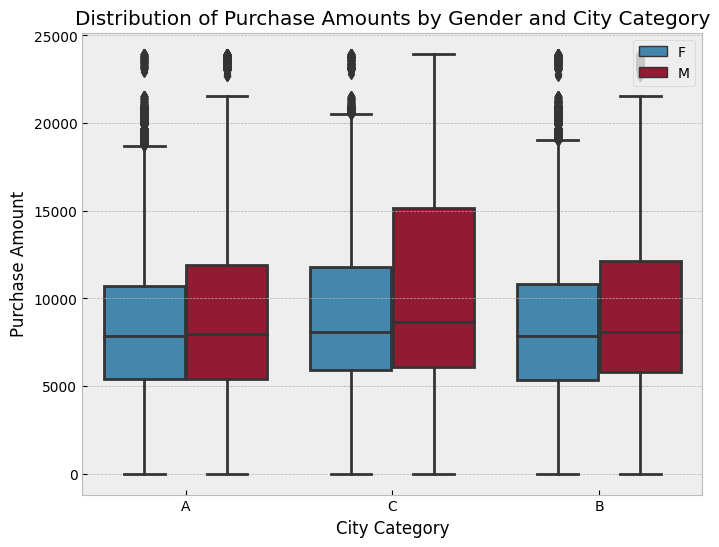

In [30]:
# Create a box plot of the distribution of purchase amounts by gender and city category
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='City_Category', y='Purchase', hue='Gender')
plt.title('Distribution of Purchase Amounts by Gender and City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.legend(loc='upper right')
plt.show()

# Feature Engineering for Model building

### Drop unwanted columns

In [31]:
data = data.drop(["User_ID","Product_ID"],axis=1)

### Correlation Between Numerical Features Using Heatmap

<AxesSubplot: >

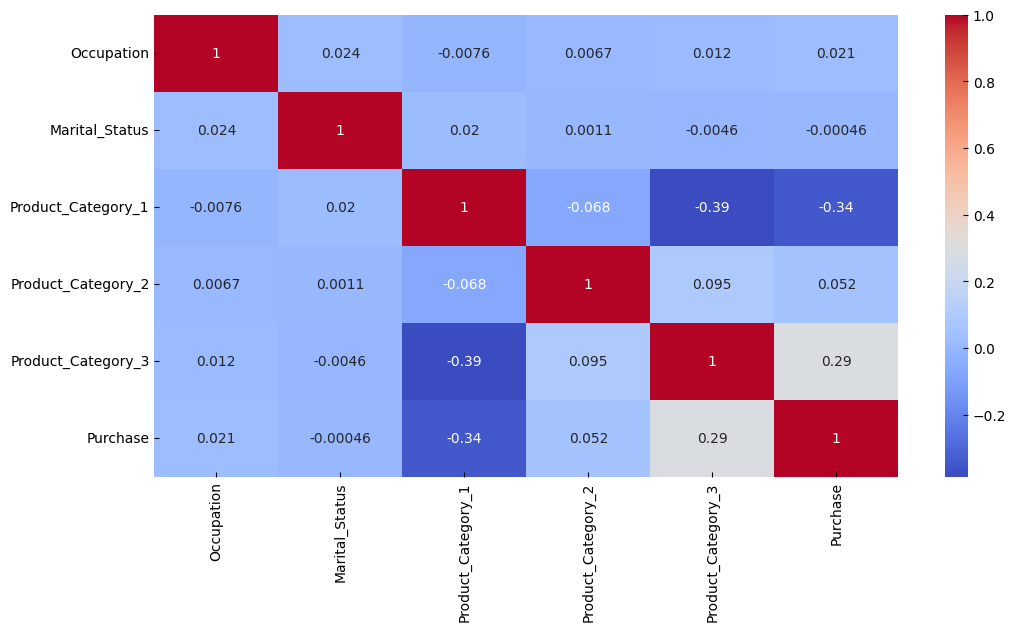

In [32]:
num_cols = data.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12,6))
sns.heatmap(data[num_cols].corr(),annot=True,cmap='coolwarm')

- As we can see from the heatmap above, all the Features are not correleted with the __Purchase__, instead most of them are correlated with each other.

## Convert Categorical variable into Numerical

In [33]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [34]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

In [35]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [36]:
data['Gender'] = LE.fit_transform(data['Gender'])

In [37]:
data['Age'] = LE.fit_transform(data['Age'])

In [38]:
data['City_Category'] = LE.fit_transform(data['City_Category'])

In [39]:
data['Marital_Status'] = LE.fit_transform(data['Marital_Status'])

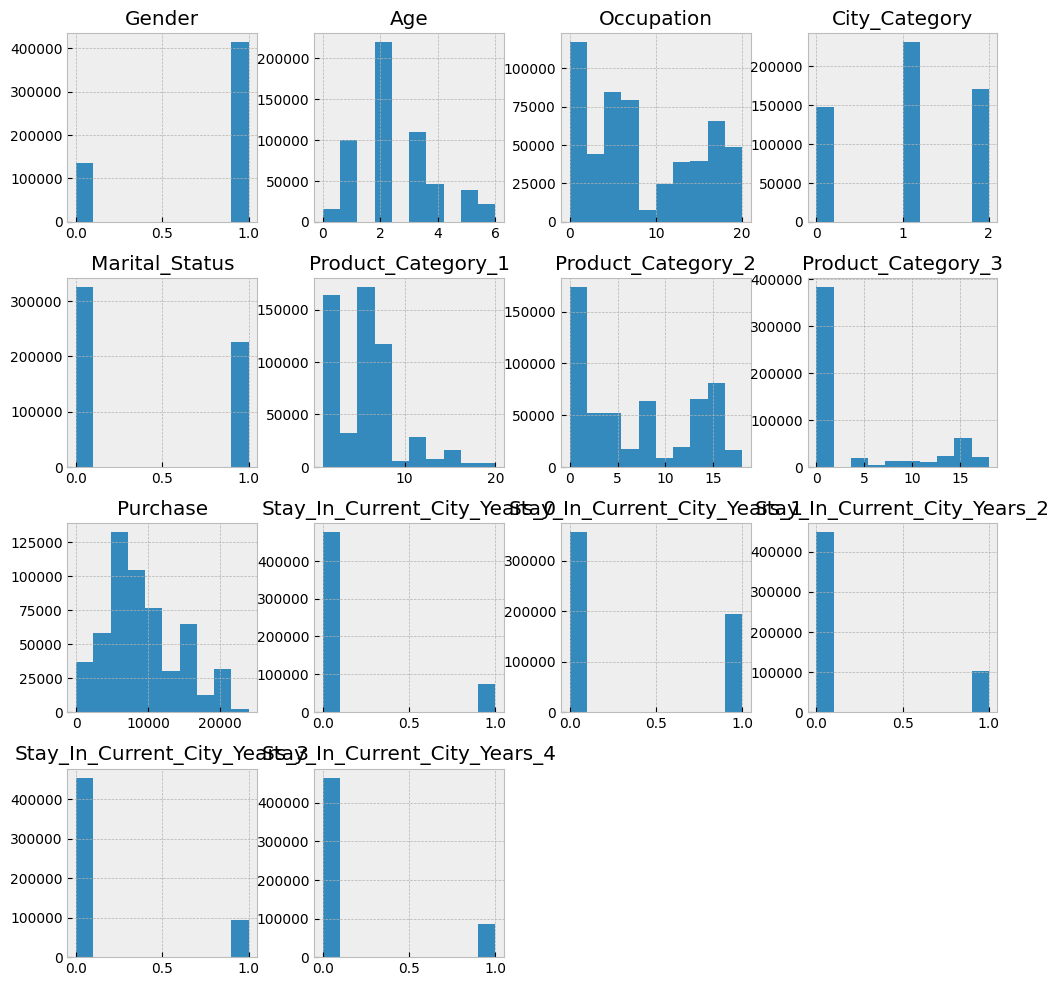

In [40]:
data.hist(figsize = (12,12))
plt.show()

- __------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## Scaling And Transformation

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
RS = RobustScaler()

In [43]:
data[['Age','Occupation']] = RS.fit_transform(data[['Age','Occupation']])

## Splitting Data Into Independent And Dependent Variables

In [44]:
X = data.drop("Purchase",axis=1)

In [45]:
y=data['Purchase']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model Selection/Predictions

## 1. Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
LR = LinearRegression()

In [50]:
LR.fit(X_train,y_train)

LinearRegression()

In [51]:
LR_y_pred = LR.predict(X_test)

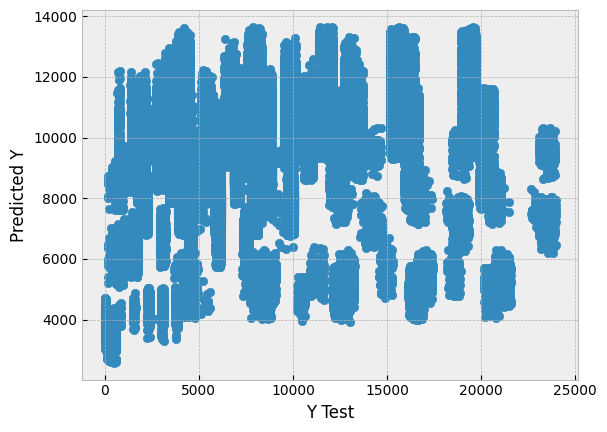

In [52]:
plt.scatter(x=y_test,y=LR_y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [54]:
mean_absolute_error(y_test, LR_y_pred)

3529.2817093165413

In [55]:
mean_squared_error(y_test, LR_y_pred)

21416007.8989785

In [56]:
r2_score(y_test, LR_y_pred)

0.15023513815129363

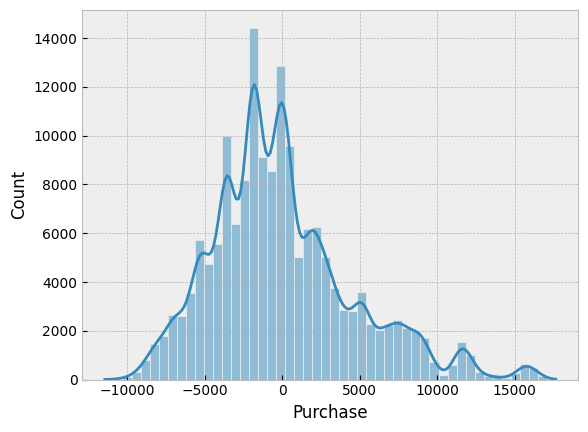

In [57]:
sns.histplot((y_test-LR_y_pred),bins=50,kde=True)
plt.show()

## 2. Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor 

In [59]:
DTR = DecisionTreeRegressor(random_state = 42) 

In [60]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
DTR_y_pred = DTR.predict(X_test)

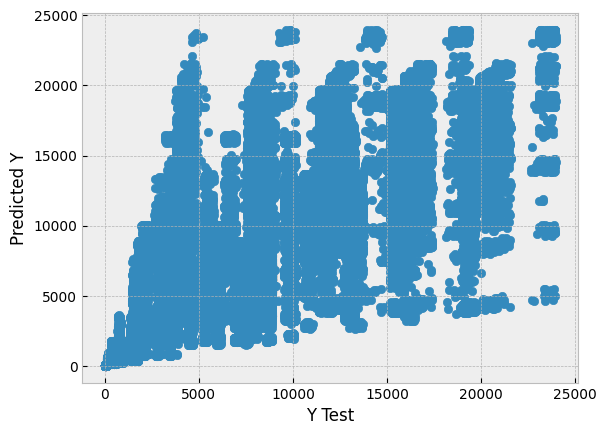

In [62]:
plt.scatter(x=y_test,y=DTR_y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [63]:
mean_absolute_error(y_test, DTR_y_pred)

2381.2563346644984

In [64]:
mean_squared_error(y_test, DTR_y_pred)

11410205.130702421

In [65]:
r2_score(y_test, DTR_y_pred)

0.5472549584267186

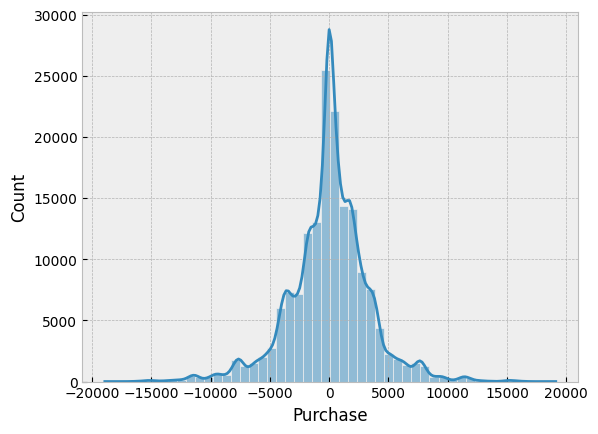

In [66]:
sns.histplot((y_test-DTR_y_pred),bins=50,kde=True)
plt.show()

## 3. Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
RFR = RandomForestRegressor(random_state = 0)  

In [69]:
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [70]:
RFR_y_pred = RFR.predict(X_test)

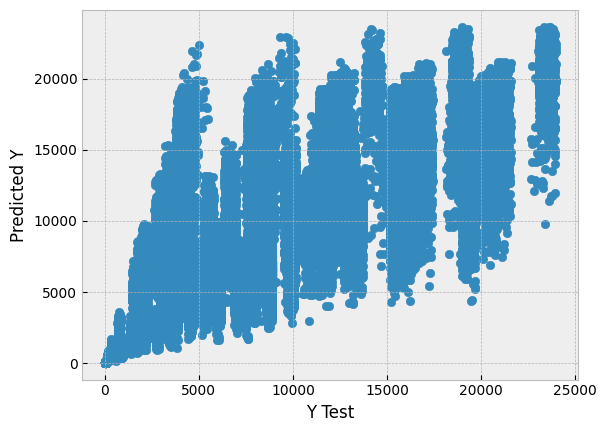

In [71]:
plt.scatter(x=y_test,y=RFR_y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [72]:
mean_absolute_error(y_test, RFR_y_pred)

2227.16366988596

In [73]:
mean_squared_error(y_test, RFR_y_pred)

9371638.76895137

In [74]:
r2_score(y_test, RFR_y_pred)

0.6281431459420692

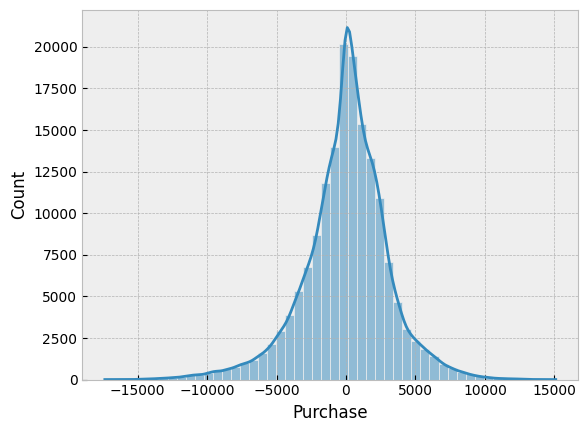

In [75]:
sns.histplot((y_test-RFR_y_pred),bins=50,kde=True)
plt.show()

- Notice here that our __residuals looked to be normally distributed__ and that's really a __good sign which means that our model was a correct choice for the data.__ 

# Actual Vs Predicted sample.

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,-2.0,0.25,0,0,3,0.0,0.0,8370,0,0,1,0,0
1,0,-2.0,0.25,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,0,-2.0,0.25,0,0,12,0.0,0.0,1422,0,0,1,0,0
3,0,-2.0,0.25,0,0,12,14.0,0.0,1057,0,0,1,0,0
4,1,4.0,0.75,2,0,8,0.0,0.0,7969,0,0,0,0,1


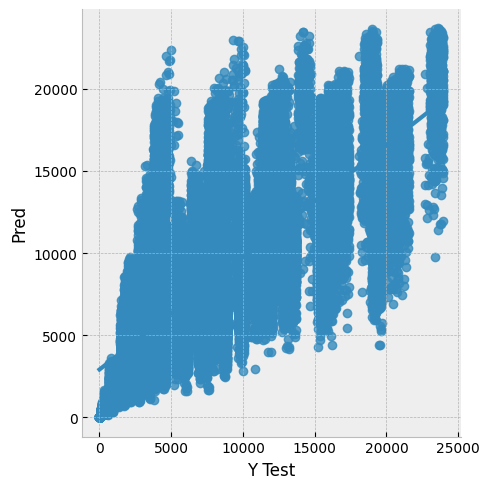

In [76]:
data1 = pd.DataFrame({'Y Test':y_test , 'Pred':RFR_y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data1,palette='rainbow')
data.head()

## Conclusions

- In this project, we explored the Black Friday dataset and performed exploratory data analysis using Pandas, Matplotlib, and Seaborn. We also learned how to handle missing values and preprocess the data to create new features that can improve our predictions.
- Using Pandas profiling, we generated an HTML report containing all the information about the various features present in the dataset. From our analysis, we found that the type and date/year columns have a significant impact on the average price increase/decrease rate.
- Moreover, we identified the features that are highly positively and negatively correlated with price, which can help us better predict the price of products during the next Black Friday sale.
- We also experimented with various machine learning models, including Linear Regression, Decision Tree Regression, and Random Forest Regression, to predict the purchase amount based on the available features. We evaluated the models using the RMSE and residual score, and found that the Random Forest model performed the best with an accuracy score of 62%.
- Overall, this project provided valuable insights into how to perform data analysis, preprocess data, and build machine learning models to make accurate predictions.